# FairCLS
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HanXudong/Fair_NLP_Classification/blob/main/demo.ipynb)

## 1. Installation

Download the whl file for installation https://drive.google.com/file/d/1l3GmCm6UxbUh1QvMnfSrysdthFaFU-Eh/view?usp=sharing

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1l3GmCm6UxbUh1QvMnfSrysdthFaFU-Eh' -O 'faircls-0.0.1-py3-none-any.whl'

--2022-03-24 09:56:26--  https://docs.google.com/uc?export=download&id=1l3GmCm6UxbUh1QvMnfSrysdthFaFU-Eh
Resolving docs.google.com (docs.google.com)... 173.194.214.138, 173.194.214.101, 173.194.214.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3hcj3r8rucrdaqoebqe4mph22m8d9gii/1648115775000/17527887236587461918/*/1l3GmCm6UxbUh1QvMnfSrysdthFaFU-Eh?e=download [following]
--2022-03-24 09:56:27--  https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3hcj3r8rucrdaqoebqe4mph22m8d9gii/1648115775000/17527887236587461918/*/1l3GmCm6UxbUh1QvMnfSrysdthFaFU-Eh?e=download
Resolving doc-0g-0k-docs.googleusercontent.com (doc-0g-0k-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-0g-0k-docs.googleusercontent.com (doc-0g-0k-docs

In [ ]:
!pip install faircls-0.0.1-py3-none-any.whl

Processing ./faircls-0.0.1-py3-none-any.whl
faircls is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [ ]:
import faircls

## 2. Prepare Dataset

For demostration purpose, we provide a tiny synthetic dataset in the same format as the Moji dataset, which can be downloaded as follows:

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1j4f6N4AncY4hER6xUuXFkB9m8SvPcKT8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1j4f6N4AncY4hER6xUuXFkB9m8SvPcKT8" -O sample_data.tar.gz && rm -rf /tmp/cookies.txt

--2022-03-24 09:56:39--  https://docs.google.com/uc?export=download&confirm=t&id=1j4f6N4AncY4hER6xUuXFkB9m8SvPcKT8
Resolving docs.google.com (docs.google.com)... 173.194.214.113, 173.194.214.138, 173.194.214.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckgc78os9o8bdehbpjprruki37d9lbn1/1648115775000/17527887236587461918/*/1j4f6N4AncY4hER6xUuXFkB9m8SvPcKT8?e=download [following]
--2022-03-24 09:56:39--  https://doc-10-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckgc78os9o8bdehbpjprruki37d9lbn1/1648115775000/17527887236587461918/*/1j4f6N4AncY4hER6xUuXFkB9m8SvPcKT8?e=download
Resolving doc-10-0k-docs.googleusercontent.com (doc-10-0k-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-10-0k-docs.googleusercontent.com (doc-

In [ ]:
# !tar -xvf  'test.tar' -C 'content/cell_images'
!tar -xvf sample_data.tar.gz 

data/Sample/
data/Sample/dev/
data/Sample/dev/neg_neg.npy
data/Sample/dev/neg_pos.npy
data/Sample/dev/pos_neg.npy
data/Sample/dev/pos_pos.npy
data/Sample/test/
data/Sample/test/neg_neg.npy
data/Sample/test/neg_pos.npy
data/Sample/test/pos_neg.npy
data/Sample/test/pos_pos.npy
data/Sample/train/
data/Sample/train/neg_neg.npy
data/Sample/train/neg_pos.npy
data/Sample/train/pos_neg.npy
data/Sample/train/pos_pos.npy


## 3. Standard Usage

Here we provide an example of training a standard model without debiasing. 

In [ ]:
!rm -rf results

In [ ]:
args = {
    # The name of the dataset, correponding dataloader will be used,
    # This will also affect the saving path
    "dataset":"Sample", 

    # Specifiy the path to the input data
    "data_dir":"data/Sample",

    # Give a name to the exp, which will be used in the path
    "exp_id":"vanilla",

    # Used CPU
    "device_id":-1,
}

In [ ]:
# Init the argument
options = faircls.BaseOptions()
state = options.get_state(args=args, silence=True)

INFO:root:Unexpected args: ['-f', '/root/.local/share/jupyter/runtime/kernel-8788862f-cf35-44b5-a1c9-b78637583989.json']
INFO:root:Logging to ./results/dev/Sample/vanilla/output.log


2022-03-24 09:56:43 [INFO ]  ======================================== 2022-03-24 09:56:43 ========================================
2022-03-24 09:56:43 [INFO ]  Base directory is ./results/dev/Sample/vanilla
Loaded data shapes: (4998, 2304), (4998,), (4998,)
Loaded data shapes: (2000, 2304), (2000,), (2000,)
Loaded data shapes: (2000, 2304), (2000,), (2000,)


In [ ]:
# Init Model
model = faircls.networks.get_main_model(state)

2022-03-24 09:56:43 [INFO ]  MLP( 
2022-03-24 09:56:43 [INFO ]    (output_layer): Linear(in_features=300, out_features=2, bias=True)
2022-03-24 09:56:43 [INFO ]    (AF): Tanh()
2022-03-24 09:56:43 [INFO ]    (hidden_layers): ModuleList(
2022-03-24 09:56:43 [INFO ]      (0): Linear(in_features=2304, out_features=300, bias=True)
2022-03-24 09:56:43 [INFO ]      (1): Tanh()
2022-03-24 09:56:43 [INFO ]      (2): Linear(in_features=300, out_features=300, bias=True)
2022-03-24 09:56:43 [INFO ]      (3): Tanh()
2022-03-24 09:56:43 [INFO ]    )
2022-03-24 09:56:43 [INFO ]    (criterion): CrossEntropyLoss()
2022-03-24 09:56:43 [INFO ]  )
2022-03-24 09:56:43 [INFO ]  Total number of parameters: 782402 



In [ ]:
model.train_self()

2022-03-24 09:56:43 [INFO ]  Epoch:    0 [      0/   4998 ( 0%)]	Loss: 0.6946	 Data Time: 0.02s	Train Time: 0.11s
2022-03-24 09:56:43 [INFO ]  Evaluation at Epoch 0
2022-03-24 09:56:43 [INFO ]  Validation accuracy: 67.15	macro_fscore: 67.13	micro_fscore: 67.15	TPR_GAP: 45.35	FPR_GAP: 45.35	PPR_GAP: 45.30	
2022-03-24 09:56:43 [INFO ]  Test accuracy: 68.15	macro_fscore: 68.15	micro_fscore: 68.15	TPR_GAP: 46.92	FPR_GAP: 46.92	PPR_GAP: 46.70	
2022-03-24 09:56:44 [INFO ]  Epoch:    1 [      0/   4998 ( 0%)]	Loss: 0.4529	 Data Time: 0.01s	Train Time: 0.08s
2022-03-24 09:56:44 [INFO ]  Evaluation at Epoch 1
2022-03-24 09:56:44 [INFO ]  Validation accuracy: 71.75	macro_fscore: 71.67	micro_fscore: 71.75	TPR_GAP: 37.57	FPR_GAP: 37.57	PPR_GAP: 36.30	
2022-03-24 09:56:44 [INFO ]  Test accuracy: 72.25	macro_fscore: 72.09	micro_fscore: 72.25	TPR_GAP: 37.40	FPR_GAP: 37.40	PPR_GAP: 35.90	
2022-03-24 09:56:44 [INFO ]  Epoch:    2 [      0/   4998 ( 0%)]	Loss: 0.3884	 Data Time: 0.01s	Train Time: 0.11s


In [ ]:
debiasing_args = {
    "dataset":"Sample",
    "data_dir":"data/Sample",
    "device_id":-1,

    # Perform adversarial training if True
    "adv_debiasing":True,

    # Specify the hyperparameters for Balanced Training
    "BT":"Resampling",
    "BTObj":"EO",
    "exp_id":"BT_Adv",
    
}

debias_options = faircls.BaseOptions()
debias_state = debias_options.get_state(args=debiasing_args, silence=True)

2022-03-24 09:56:50 [INFO ]  Unexpected args: ['-f', '/root/.local/share/jupyter/runtime/kernel-8788862f-cf35-44b5-a1c9-b78637583989.json']
2022-03-24 09:56:50 [INFO ]  Logging to ./results/dev/Sample/BT_Adv/output.log
2022-03-24 09:56:50 [INFO ]  ======================================== 2022-03-24 09:56:50 ========================================
2022-03-24 09:56:50 [INFO ]  Base directory is ./results/dev/Sample/BT_Adv
Loaded data shapes: (1996, 2304), (1996,), (1996,)
Loaded data shapes: (2000, 2304), (2000,), (2000,)
Loaded data shapes: (2000, 2304), (2000,), (2000,)
2022-03-24 09:56:51 [INFO ]  SubDiscriminator( 
2022-03-24 09:56:51 [INFO ]    (grad_rev): GradientReversal()
2022-03-24 09:56:51 [INFO ]    (output_layer): Linear(in_features=300, out_features=2, bias=True)
2022-03-24 09:56:51 [INFO ]    (AF): ReLU()
2022-03-24 09:56:51 [INFO ]    (hidden_layers): ModuleList(
2022-03-24 09:56:51 [INFO ]      (0): Linear(in_features=300, out_features=300, bias=True)
2022-03-24 09:56:51

In [ ]:
debias_model = faircls.networks.get_main_model(debias_state)

2022-03-24 09:56:51 [INFO ]  MLP( 
2022-03-24 09:56:51 [INFO ]    (output_layer): Linear(in_features=300, out_features=2, bias=True)
2022-03-24 09:56:51 [INFO ]    (AF): Tanh()
2022-03-24 09:56:51 [INFO ]    (hidden_layers): ModuleList(
2022-03-24 09:56:51 [INFO ]      (0): Linear(in_features=2304, out_features=300, bias=True)
2022-03-24 09:56:51 [INFO ]      (1): Tanh()
2022-03-24 09:56:51 [INFO ]      (2): Linear(in_features=300, out_features=300, bias=True)
2022-03-24 09:56:51 [INFO ]      (3): Tanh()
2022-03-24 09:56:51 [INFO ]    )
2022-03-24 09:56:51 [INFO ]    (criterion): CrossEntropyLoss()
2022-03-24 09:56:51 [INFO ]  )
2022-03-24 09:56:51 [INFO ]  Total number of parameters: 782402 



In [ ]:
debias_model.train_self()

2022-03-24 09:56:51 [INFO ]  Epoch:    0 [      0/   1996 ( 0%)]	Loss: 0.0000	 Data Time: 0.03s	Train Time: 0.35s
2022-03-24 09:56:52 [INFO ]  Evaluation at Epoch 0
2022-03-24 09:56:52 [INFO ]  Validation accuracy: 67.30	macro_fscore: 67.01	micro_fscore: 67.30	TPR_GAP: 18.22	FPR_GAP: 18.22	PPR_GAP: 18.00	
2022-03-24 09:56:52 [INFO ]  Test accuracy: 70.65	macro_fscore: 70.56	micro_fscore: 70.65	TPR_GAP: 18.46	FPR_GAP: 18.46	PPR_GAP: 17.90	
2022-03-24 09:56:52 [INFO ]  Epoch:    1 [      0/   1996 ( 0%)]	Loss: -0.1402	 Data Time: 0.01s	Train Time: 0.39s
2022-03-24 09:56:53 [INFO ]  Evaluation at Epoch 1
2022-03-24 09:56:53 [INFO ]  Validation accuracy: 71.50	macro_fscore: 71.50	micro_fscore: 71.50	TPR_GAP: 15.93	FPR_GAP: 15.93	PPR_GAP: 13.00	
2022-03-24 09:56:53 [INFO ]  Test accuracy: 74.00	macro_fscore: 73.98	micro_fscore: 74.00	TPR_GAP: 18.83	FPR_GAP: 18.83	PPR_GAP: 17.40	
2022-03-24 09:56:53 [INFO ]  Epoch:    2 [      0/   1996 ( 0%)]	Loss: -0.1515	 Data Time: 0.01s	Train Time: 0.22

## Analysis

In this section, we demonstrate the analysis module of FairCLS, which can be used for retriving results, selecting models, and comparing models.

Loading saved results. The saving dir is specified by the arguments when initialing the state for training. 

Briefly, the resulting dir is: `results_dir`/`project_dir`/`dataset`/`exp_id`.

The following example shows the information that has been stored for each epoch:

In [ ]:
import torch

epoch_results = torch.load("results/dev/Sample/vanilla/models/checkpoint_epoch0.pth.tar")
print(epoch_results.keys())

dict_keys(['epoch', 'epochs_since_improvement', 'loss', 'valid_confusion_matrices', 'test_confusion_matrices', 'dev_evaluations', 'test_evaluations'])


We currently save the following scores for performacne and fairness, other metrics can be calculated based to confusion matrices.

In [ ]:
print(epoch_results["dev_evaluations"])

{'accuracy': 0.6715, 'macro_fscore': 0.6713184856336911, 'micro_fscore': 0.6715, 'TPR_GAP': 0.45348647559547023, 'FPR_GAP': 0.45348650280465924, 'PPR_GAP': 0.45299999546999997}


In [ ]:
from faircls import analysis

`model_selection` is for retriving experiimental results, selecting the desired epoch, and save the resulting df for later process.

In [ ]:
analysis.model_selection(
    results_dir= r"results/dev",
    project_dir= r"Sample",
    model_id= ("vanilla"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    n_jobs=1,
    index_column_names = ["BT", "BTObj", "adv_debiasing"],
    save_path = r"results/Vanilla_df.pkl"
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


,,,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
BT,BTObj,adv_debiasing,,,,,,,,
NaN,NaN,False,2,0.624263,0.7175,0.006645,0.62596,0.7225,0.002072,results/dev/Sample/vanilla/opt.yaml


In [ ]:
analysis.model_selection(
    results_dir= r"results/dev",
    project_dir= r"Sample",
    model_id= ("BT_Adv"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    n_jobs=1,
    index_column_names = ["BT", "BTObj", "adv_debiasing"],
    save_path = r"results/BT_ADV_df.pkl"
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


,,,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
BT,BTObj,adv_debiasing,,,,,,,,
Resampling,EO,True,0,0.883638,0.735,0.014538,0.862559,0.7445,0.018616,results/dev/Sample/BT_Adv/opt.yaml


We have preprocing the results with the `model_selection` function, and the resulting dfs can be downloaded as follows:

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M0G6PyPuDC8Y_2nL9XKYCt10IUzbSvfl' -O retrived_results.tar.gz

--2022-03-24 09:56:57--  https://docs.google.com/uc?export=download&id=1M0G6PyPuDC8Y_2nL9XKYCt10IUzbSvfl
Resolving docs.google.com (docs.google.com)... 173.194.214.101, 173.194.214.100, 173.194.214.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqms6pkd54nqh688bv4lavhsfepljige/1648115775000/17527887236587461918/*/1M0G6PyPuDC8Y_2nL9XKYCt10IUzbSvfl?e=download [following]
--2022-03-24 09:56:59--  https://doc-0g-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqms6pkd54nqh688bv4lavhsfepljige/1648115775000/17527887236587461918/*/1M0G6PyPuDC8Y_2nL9XKYCt10IUzbSvfl?e=download
Resolving doc-0g-0k-docs.googleusercontent.com (doc-0g-0k-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-0g-0k-docs.googleusercontent.com (doc-0g-0k-docs

In [ ]:
!tar -xvf retrived_results.tar.gz

analysis/results/
analysis/results/Bios_both_Adv_df.pkl
analysis/results/Bios_both_BTFairBatch_df.pkl
analysis/results/Bios_both_BTGAdv_df.pkl
analysis/results/Bios_both_BTGDAdv_df.pkl
analysis/results/Bios_both_DAdv_df.pkl
analysis/results/Bios_both_FairBatch_df.pkl
analysis/results/Bios_both_GAdv_df.pkl
analysis/results/Bios_both_GDAdv_df.pkl
analysis/results/Bios_both_INLP_df.pkl
analysis/results/Bios_both_OldFairBatch_df.pkl
analysis/results/Bios_both_Vanilla_df.pkl
analysis/results/Bios_gender_Adv_df.pkl
analysis/results/Bios_gender_BTEO_df.pkl
analysis/results/Bios_gender_BTFairBatch_df.pkl
analysis/results/Bios_gender_BTGAdv_df.pkl
analysis/results/Bios_gender_BTGDAdv_df.pkl
analysis/results/Bios_gender_DAdv_df.pkl
analysis/results/Bios_gender_FairBatch_df.pkl
analysis/results/Bios_gender_FairSCL_df.pkl
analysis/results/Bios_gender_GAdv_df.pkl
analysis/results/Bios_gender_GatedBTEO_df.pkl
analysis/results/Bios_gender_GDAdv_df.pkl
analysis/results/Bios_gender_GDEO_df.pkl
analysis

Here we demostrate the application of `final_results_df`. We load chached results with `retrive_results`.

In [ ]:
Moji_results = analysis.retrive_results("Moji", log_dir="analysis/results")

In [ ]:
Moji_main_results = analysis.final_results_df(
    results_dict = Moji_results,
    pareto = False,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = True,
    # Fairness_threshold=0.95,
    # return_conf=True,
    # save_conf_dir=r"D:\Project\Fair_NLP_Classification\analysis\reproduce\Moji"
    )
Moji_main_results

,Models,test_performance mean,test_performance std,test_fairness mean,test_fairness std,dev_performance mean,dev_performance std,dev_fairness mean,dev_fairness std,DTO
0,BTGatedAdv,0.735459,0.028830,0.866150,0.028232,0.730150,0.024594,0.886862,0.030537,0.296476
1,FairSCL,0.757314,0.003441,0.878219,0.004314,0.752825,0.001872,0.898325,0.002579,0.271527
2,Vanilla,0.722981,0.004576,0.611870,0.014356,0.726650,0.003673,0.632302,0.013370,0.476849
3,BTFairBatch,0.746837,0.003407,0.899351,0.004936,0.743975,0.004236,0.919254,0.004731,0.272437
4,BTEO,0.753927,0.001433,0.877469,0.003756,0.746325,0.000998,0.896874,0.005401,0.274892
5,GatedBTEO,0.762106,0.002592,0.900764,0.014701,0.759775,0.003798,0.909445,0.006631,0.257762
6,GatedDAdv,0.750163,0.006945,0.908679,0.021678,0.745600,0.004828,0.928670,0.022488,0.266004
7,DAdv,0.755464,0.004076,0.904023,0.011218,0.748550,0.002405,0.915601,0.005007,0.262697
8,INLP,0.733433,NaN,0.855982,NaN,0.727625,NaN,0.859686,NaN,0.302983
9,Adv,0.756414,0.007271,0.893286,0.005623,0.747425,0.004549,0.912125,0.008507,0.265936


In [ ]:
print(Moji_main_results.to_latex(index=False))

\begin{tabular}{lrrrrrrrrr}
\toprule
        Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &      DTO \\
\midrule
    BTGatedAdv &               0.735459 &              0.028830 &            0.866150 &           0.028232 &              0.730150 &             0.024594 &           0.886862 &          0.030537 & 0.296476 \\
       FairSCL &               0.757314 &              0.003441 &            0.878219 &           0.004314 &              0.752825 &             0.001872 &           0.898325 &          0.002579 & 0.271527 \\
       Vanilla &               0.722981 &              0.004576 &            0.611870 &           0.014356 &              0.726650 &             0.003673 &           0.632302 &          0.013370 & 0.476849 \\
   BTFairBatch &               0.746837 &              0.003407 &            0.899351 &           0.004936 &  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
def make_plot(plot_df, figure_name=None):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Accuracy"] = plot_df["test_performance mean"]

    figure = plt.figure(figsize=(6, 6), dpi = 150) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Accuracy",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )
    if figure_name is not None:
        figure.savefig(Path(r"plots") / figure_name, dpi=960, bbox_inches="tight") 

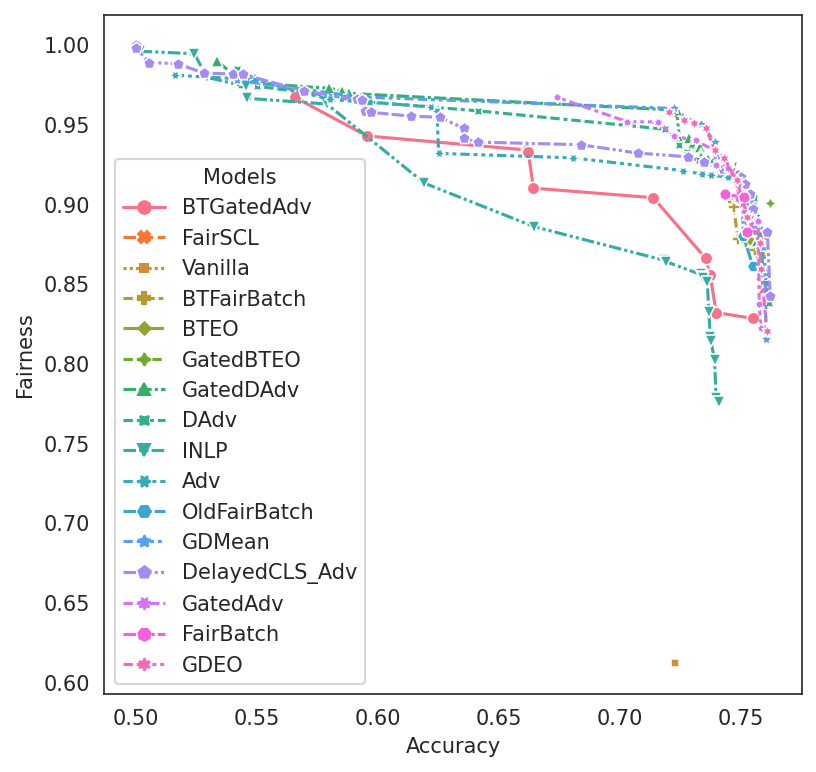

In [ ]:
Moji_plot_df = analysis.final_results_df(
    results_dict = Moji_results,
    pareto = True,
    # pareto = False,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    # Performance_threshold=0.72
    # num_trail=20,
    )
make_plot(Moji_plot_df)